<a href="https://colab.research.google.com/github/rubythalib33/Sekolah-AI-Indonesia/blob/main/Course%201.%20Pytorch%2BLightning%20Coureses%20Level%201/1_5_RNN_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.5 RNN training
Syllabus:
1. import dependencies
2. prepare datasets
3. create model using pytorch
4. Training time
5. result

## 1. import dependencies

In [1]:
!pip install pytorch_lightning

     |████████████████████████████████| 527 kB 5.2 MB/s 
     |████████████████████████████████| 397 kB 36.1 MB/s 
     |████████████████████████████████| 829 kB 37.0 MB/s 
     |████████████████████████████████| 596 kB 35.2 MB/s 
     |████████████████████████████████| 952 kB 41.7 MB/s 
     |████████████████████████████████| 133 kB 47.6 MB/s 
     |████████████████████████████████| 1.1 MB 43.9 MB/s 
     |████████████████████████████████| 94 kB 2.7 MB/s 
     |████████████████████████████████| 144 kB 47.0 MB/s 
     |████████████████████████████████| 271 kB 45.0 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=96da89c66a2463da8086dc76cb34bca0e94735120e61046e9669098e1cc44b9f
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successful

In [2]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
import random
import matplotlib.pyplot as plt
import unicodedata
import string

## 2. prepare datasets

In [3]:
!wget https://download.pytorch.org/tutorial/data.zip

--2022-02-12 06:25:50--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.226.50.63, 13.226.50.77, 13.226.50.24, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.226.50.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  --.-KB/s    in 0.1s    

2022-02-12 06:25:50 (21.1 MB/s) - ‘data.zip’ saved [2882130/2882130]



In [4]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/Italian.txt  
  inflating: data/names/Japanese.txt  
  inflating: data/names/Korean.txt   
  inflating: data/names/Polish.txt   
  inflating: data/names/Portuguese.txt  
  inflating: data/names/Russian.txt  
  inflating: data/names/Scottish.txt  
  inflating: data/names/Spanish.txt  
  inflating: data/names/Vietnamese.txt  


In [5]:
def findFiles(path):
  return glob.glob(path)

print(findFiles('data/names/*.txt'))

['data/names/French.txt', 'data/names/Russian.txt', 'data/names/Portuguese.txt', 'data/names/Spanish.txt', 'data/names/Polish.txt', 'data/names/Chinese.txt', 'data/names/Dutch.txt', 'data/names/Irish.txt', 'data/names/English.txt', 'data/names/Czech.txt', 'data/names/Scottish.txt', 'data/names/Japanese.txt', 'data/names/Vietnamese.txt', 'data/names/Greek.txt', 'data/names/Arabic.txt', 'data/names/German.txt', 'data/names/Korean.txt', 'data/names/Italian.txt']


In [6]:
all_letters = string.ascii_letters + ".,;"
n_letters = len(all_letters)

In [7]:
# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
  return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn' and c in all_letters)

In [8]:
print(unicodeToAscii('Ślusàrski'))

Slusarski


In [9]:
# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

def readLines(filename):
  lines = open(filename, encoding='utf-8').read().strip().split('\n')
  return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
  category = os.path.splitext(os.path.basename(filename))[0]
  all_categories.append(category)
  lines = readLines(filename)
  category_lines[category] = lines

n_categories = len(all_categories)

print(all_categories)
print(n_categories)
print(category_lines)

['French', 'Russian', 'Portuguese', 'Spanish', 'Polish', 'Chinese', 'Dutch', 'Irish', 'English', 'Czech', 'Scottish', 'Japanese', 'Vietnamese', 'Greek', 'Arabic', 'German', 'Korean', 'Italian']
18
{'French': ['Abel', 'Abraham', 'Adam', 'Albert', 'Allard', 'Archambault', 'Armistead', 'Arthur', 'Augustin', 'Babineaux', 'Baudin', 'Beauchene', 'Beaulieu', 'Beaumont', 'Belanger', 'Bellamy', 'Bellerose', 'Belrose', 'Berger', 'Beringer', 'Bernard', 'Bertrand', 'Bisset', 'Bissette', 'Blaise', 'Blanc', 'Blanchet', 'Blanchett', 'Bonfils', 'Bonheur', 'Bonhomme', 'Bonnaire', 'Bonnay', 'Bonner', 'Bonnet', 'Borde', 'Bordelon', 'Bouchard', 'Boucher', 'Brisbois', 'Brodeur', 'Bureau', 'Caron', 'Cavey', 'Chaput', 'Charbonneau', 'Charpentier', 'Charron', 'Chastain', 'Chevalier', 'Chevrolet', 'Cloutier', 'Colbert', 'Comtois', 'Cornett', 'Cote', 'Coupe', 'Courtemanche', 'Cousineau', 'Couture', 'Daniau', 'Daramitz', 'Daviau', 'David', 'Deforest', 'Degarmo', 'Delacroix', 'Delafontaine', 'Deniau', 'Deniaud', 

In [10]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [11]:
#Turning Names into tensor

def letterToIndex(letter):
  return all_letters.find(letter)

def letterToTensor(letter):
  tensor = torch.zeros(1, n_letters)
  tensor[0][letterToIndex(letter)] = 1
  return tensor

def lineToTensor(line):
  tensor = torch.zeros(len(line), 1, n_letters)
  for li, letter in enumerate(line):
    tensor[li][0][letterToIndex(letter)] = 1
  
  return tensor

print(letterToTensor('J'))
print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.]])
torch.Size([5, 1, 55])


## 3. Creating Model using Pytorch Lightning

before we are using the common nn.RNN lets try to create it from scratch so we are understand what happen inside

Before autograd, creating a recurrent neural network in Torch involved cloning the parameters of a layer over several timesteps. The layers held hidden state and gradients which are now entirely handled by the graph itself. This means you can implement a RNN in a very “pure” way, as regular feed-forward layers.

This RNN module (mostly copied from the PyTorch for Torch users tutorial) is just 2 linear layers which operate on an input and hidden state, with a LogSoftmax layer after the output.

source: https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html

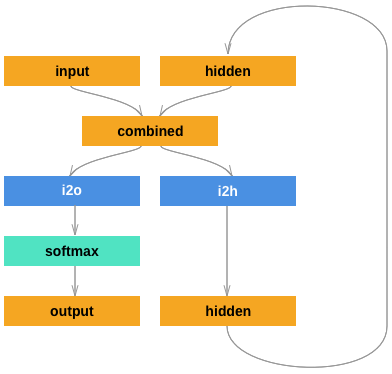

In [12]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()

    self.hidden_size = hidden_size

    self.i2h = nn.Linear(input_size+hidden_size, hidden_size)
    self.i2o = nn.Linear(input_size+hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim=1)
  
  def forward(self, input, hidden):
    combined = torch.cat((input, hidden), 1)
    hidden = self.i2h(combined)
    output = self.i2o(combined)
    output = self.softmax(output)
    return output, hidden
  
  def initHidden(self):
    return torch.zeros(1, self.hidden_size)

In [13]:
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [14]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
print(output.shape, next_hidden.shape)

torch.Size([1, 18]) torch.Size([1, 128])


In [15]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.9564, -2.9589, -2.8044, -2.8680, -2.8501, -2.9270, -2.9375, -2.7876,
         -2.9101, -2.8303, -2.8281, -2.8687, -2.9250, -2.9836, -2.8557, -2.9077,
         -3.0140, -2.8482]], grad_fn=<LogSoftmaxBackward0>)


## 4. Training time

In [16]:
def categoryFromOutput(output):
  top_n, top_i = output.topk(1)
  category_i = top_i[0].item()
  return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Irish', 7)


In [17]:
import random

def randomChoice(l):
  return l[random.randint(0, len(l)-1)]

def randomTrainingExample():
  category = randomChoice(all_categories)
  line = randomChoice(category_lines[category])
  category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
  line_tensor = lineToTensor(line)
  return category, line, category_tensor, line_tensor

for i in range(10):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  print('category =', category, '/ line =', line)

category = German / line = Tanzer
category = Portuguese / line = Cardozo
category = Russian / line = Ustyantsev
category = Portuguese / line = Almeida
category = Greek / line = Calogerakis
category = Spanish / line = Herrera
category = Dutch / line = Mooren
category = Russian / line = Balanovski
category = Chinese / line = Zang
category = Portuguese / line = Melo


In [18]:
criterion = nn.NLLLoss()

In [19]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [20]:
import time
import math

n_iters = 200000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 2% (0m 7s) 3.0098 Youn / Scottish ✗ (Korean)
10000 5% (0m 17s) 2.8948 Deeb / Vietnamese ✗ (Arabic)
15000 7% (0m 23s) 3.3492 Hopkinson / Russian ✗ (English)
20000 10% (0m 28s) 1.0844 Maslanka / Polish ✓
25000 12% (0m 33s) 2.4789 Victor / Scottish ✗ (French)
30000 15% (0m 39s) 1.0824 Middlesworth / Dutch ✓
35000 17% (0m 44s) 2.8151 Paris / Greek ✗ (French)
40000 20% (0m 49s) 1.5041 Marshall / Irish ✗ (Scottish)
45000 22% (0m 55s) 2.3176 Liao / Portuguese ✗ (Chinese)
50000 25% (1m 0s) 0.2881 Ushiba / Japanese ✓
55000 27% (1m 5s) 0.4653 Thi / Vietnamese ✓
60000 30% (1m 11s) 3.8212 Gotti / Italian ✗ (German)
65000 32% (1m 16s) 4.5536 Bartosz / Spanish ✗ (Polish)
70000 35% (1m 21s) 2.7990 Parma / Spanish ✗ (Italian)
75000 37% (1m 26s) 0.8833 Villa / Spanish ✓
80000 40% (1m 32s) 0.7113 Bradach / Irish ✓
85000 42% (1m 37s) 2.8105 Baudin / Russian ✗ (French)
90000 45% (1m 43s) 0.0068 Zdunowski / Polish ✓
95000 47% (1m 49s) 0.5181 Ferguson / Scottish ✓
100000 50% (1m 54s) 0.2255 Hamacho / J

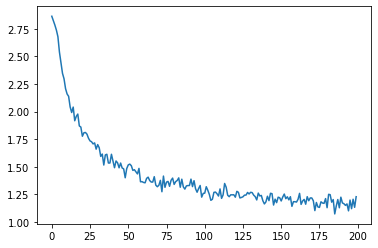

In [21]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

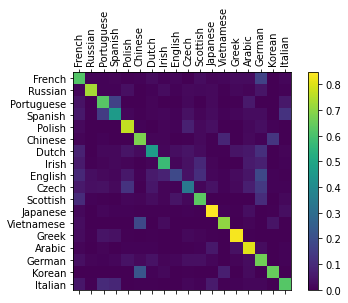

In [23]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [24]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')
predict('Ruby')
predict('Abdullah')


> Dovesky
(-0.59) Czech
(-1.08) Russian
(-3.15) English

> Jackson
(-0.40) Scottish
(-2.19) Greek
(-2.41) Russian

> Satoshi
(-0.98) Japanese
(-1.31) Arabic
(-1.46) Italian

> Ruby
(-1.41) English
(-1.58) Scottish
(-1.84) Arabic

> Abdullah
(-0.51) Scottish
(-1.94) Czech
(-2.70) Russian
